In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
import sklearn.datasets

In [2]:
data = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['PRICE'] = data.target

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

We can already see that out data is a cleaned and preprocessed. We just need to go forward with exploratory Data Analysis

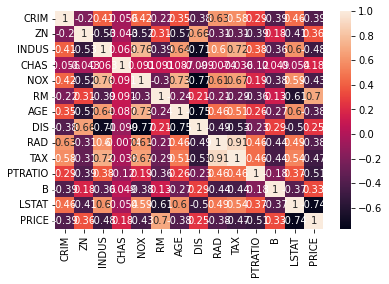

In [8]:
sns.heatmap(df.corr(), annot = True)

**NOTE:** We can drop TAX or RAD columns as they are highly correlated around 91%. Dropping a feature can reduce dimensionality and also reduces the calculation time and would give a good accuracy.

In [9]:
X = df.drop('PRICE', axis=1)
y = df['PRICE']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(X_train, y_train)
pred1 = LR.predict(X_test)

In [12]:
pred1

array([20.78865257, 15.74331166, 13.96645268, 38.27603096, 21.67740841,
       16.75173116, 30.28093113, 22.08239493, 19.53174377, 27.62649219,
       23.2685226 , 29.40991468, 18.66108541,  8.40563533, 13.05695767,
        6.25806471, 21.65519221, 32.85483739, 34.25970015, 34.59108725,
       19.73026851, 18.03397528, 31.76154637, 19.50746828, 14.8526043 ,
       22.46352588, 13.27329032,  0.14622833, 15.46001466, 26.11116022,
       31.58775253, 36.49280386, 23.34107591, 20.27280388, 24.0099209 ,
       20.90974957,  7.17540821, 42.0798976 , 17.17607331, 13.52987906,
       23.18870469, 16.67234576, 28.64476211, 22.95385983, 27.59448344,
       13.03509728, 22.94317586, 19.68090488, 15.48307971, 15.72604129,
       19.98802018, 14.06398363, 23.90242389, 28.46043967, 28.68596913,
       19.87998891, 18.19704878, 16.73122516, 34.30786709, 17.75449737,
       20.22639744, 28.7862824 , 34.87630428,  8.56972492, 19.62264776,
       23.92228874, 33.72690307, 22.3000538 , 24.71485669, 21.95

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

Scorer1 = r2_score(y_test, pred1)
Scorem1 = mean_absolute_error(y_test, pred1)
Scorer1, Scorem1

(0.666582940889166, 3.3464664160207818)

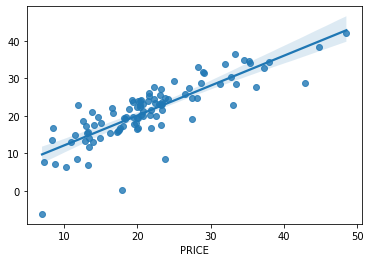

In [18]:
sns.regplot(x =y_test,y=pred1)

In [32]:
from sklearn.linear_model import Ridge

def ridge(C,solver):
  ridge = Ridge(alpha = C, solver = solver)
  ridge.fit(X_train, y_train)
  y_pred = ridge.predict(X_test)

  R2Score = r2_score(y_test, y_pred)
  MAE = mean_absolute_error(y_test, y_pred)
  print(R2Score)
  print(MAE)

In [33]:
pred1 = ridge(1,'auto')

0.6619613070040706
3.330766470166291


In [38]:
pred1 = ridge(0.5,'auto')

0.6644233422502934
3.3290106350056963


In [46]:
def metrics(y_test,y_pred):
  R2Score = r2_score(y_test, y_pred)
  MAE = mean_absolute_error(y_test, y_pred)
  print(R2Score)
  print(MAE)

In [40]:
from sklearn.model_selection import GridSearchCV

model1 = Ridge()
parameters = {'alpha':[0.1,0.5,1],
              'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}
model1 = GridSearchCV(model1, parameters, verbose = 4, cv = 5)

In [41]:
model1.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ............alpha=0.1, solver=auto;, score=0.790 total time=   0.0s
[CV 2/5] END ............alpha=0.1, solver=auto;, score=0.760 total time=   0.0s
[CV 3/5] END ............alpha=0.1, solver=auto;, score=0.743 total time=   0.0s
[CV 4/5] END ............alpha=0.1, solver=auto;, score=0.443 total time=   0.0s
[CV 5/5] END ............alpha=0.1, solver=auto;, score=0.722 total time=   0.0s
[CV 1/5] END .............alpha=0.1, solver=svd;, score=0.790 total time=   0.0s
[CV 2/5] END .............alpha=0.1, solver=svd;, score=0.760 total time=   0.0s
[CV 3/5] END .............alpha=0.1, solver=svd;, score=0.743 total time=   0.0s
[CV 4/5] END .............alpha=0.1, solver=svd;, score=0.443 total time=   0.0s
[CV 5/5] END .............alpha=0.1, solver=svd;, score=0.722 total time=   0.0s
[CV 1/5] END ........alpha=0.1, solver=cholesky;, score=0.790 total time=   0.0s
[CV 2/5] END ........alpha=0.1, solver=cholesky

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py", line 1011, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py", line 706, in fit
    "'lbfgs' solver can be used only when positive=True. "
Value

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.5, 1],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']},
             verbose=4)

In [45]:
model1.best_params_, model1.best_score_

({'alpha': 0.1, 'solver': 'svd'}, 0.6914879051434059)

In [47]:
ridge = Ridge(alpha = 0.1, solver = 'svd')
ridge.fit(X_train, y_train)
pred2 = ridge.predict(X_test)
pred2

array([20.71955842, 15.60505978, 14.17162973, 38.2359086 , 21.75012568,
       16.80032192, 30.29037997, 22.13870439, 19.59177666, 27.67342582,
       23.15416844, 29.29679082, 18.76055401,  8.62091922, 13.06385317,
        6.25365233, 21.57889638, 32.86005026, 34.22077339, 34.57510123,
       19.69750895, 18.06748441, 31.74122975, 19.52631701, 14.87212748,
       22.36894226, 13.35281121, -0.04559274, 15.46655407, 26.11428179,
       31.55477756, 36.43087528, 23.42336567, 20.29024278, 24.01123145,
       20.94449306,  7.20310182, 42.02963445, 17.22102574, 13.55580662,
       23.17890643, 16.60796788, 28.72197043, 23.00226494, 27.5356522 ,
       13.06943224, 22.97435013, 19.67443037, 15.47258589, 15.56946984,
       20.15317995, 14.0874079 , 23.8001441 , 28.51964438, 28.64357673,
       20.01782472, 18.21036275, 16.69213626, 34.27414197, 17.79469819,
       20.19554165, 28.88065325, 34.80445393,  8.5386256 , 19.54803465,
       23.84041712, 33.62959123, 22.29173091, 24.71429314, 21.93

In [48]:
metrics2 = metrics(y_test,pred2)

0.6662848917640671
3.3403173688410983


In [55]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 1, selection = 'cyclic')
lasso.fit(X_train, y_train)
pred4 = lasso.predict(X_test)

In [56]:
metrics4 = metrics(y_test, pred4)

0.5346967811565366
4.060631691435414


In [60]:
from sklearn.linear_model import ElasticNet

model4 = ElasticNet()
parameters = {'alpha':[0.5,1,1.5,5,10],
              'l1_ratio':[0.4,0.5,0.6,0.8],
              'selection':['random','cyclic']}
model4 = GridSearchCV(model4, parameters, cv = 5, verbose = 4)
model4.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END alpha=0.5, l1_ratio=0.4, selection=random;, score=0.754 total time=   0.0s
[CV 2/5] END alpha=0.5, l1_ratio=0.4, selection=random;, score=0.714 total time=   0.0s
[CV 3/5] END alpha=0.5, l1_ratio=0.4, selection=random;, score=0.686 total time=   0.0s
[CV 4/5] END alpha=0.5, l1_ratio=0.4, selection=random;, score=0.511 total time=   0.0s
[CV 5/5] END alpha=0.5, l1_ratio=0.4, selection=random;, score=0.721 total time=   0.0s
[CV 1/5] END alpha=0.5, l1_ratio=0.4, selection=cyclic;, score=0.754 total time=   0.0s
[CV 2/5] END alpha=0.5, l1_ratio=0.4, selection=cyclic;, score=0.714 total time=   0.0s
[CV 3/5] END alpha=0.5, l1_ratio=0.4, selection=cyclic;, score=0.686 total time=   0.0s
[CV 4/5] END alpha=0.5, l1_ratio=0.4, selection=cyclic;, score=0.511 total time=   0.0s
[CV 5/5] END alpha=0.5, l1_ratio=0.4, selection=cyclic;, score=0.721 total time=   0.0s
[CV 1/5] END alpha=0.5, l1_ratio=0.5, selection=random;, s

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.5, 1, 1.5, 5, 10],
                         'l1_ratio': [0.4, 0.5, 0.6, 0.8],
                         'selection': ['random', 'cyclic']},
             verbose=4)

In [63]:
model4.best_params_, model4.best_score_

({'alpha': 0.5, 'l1_ratio': 0.8, 'selection': 'cyclic'}, 0.6774930487857063)

In [68]:
en = ElasticNet(alpha = 0.005, l1_ratio = 0.8, selection = 'cyclic')
en.fit(X_train, y_train)
pred5 = en.predict(X_test)

In [69]:
metrics5 = metrics(y_test, pred5)

0.6639395669407393
3.330698540084395
